In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

filtered_adni = pd.read_csv('/work/home/nhkim/BiS495/data_f/adni_cb.csv', index_col=0)
adni_label = pd.read_csv('/work/home/nhkim/BiS495/data_f/ADNI_label.csv')

filtered_anm1 = pd.read_csv('/work/home/nhkim/BiS495/data_f/anm1_cb.csv', index_col=0)
anm1_label = pd.read_csv('/work/home/nhkim/BiS495/data_f/ANM1_label.csv')

filtered_anm2 = pd.read_csv('/work/home/nhkim/BiS495/data_f/anm2_cb.csv', index_col=0)
anm2_label = pd.read_csv('/work/home/nhkim/BiS495/data_f/ANM2_label.csv')

In [2]:
filtered_labels_adni = adni_label[adni_label['diagnosis'].isin([1, 3])]
filtered_labels_anm1 = anm1_label[anm1_label['diagnosis'].isin([1, 3])]
filtered_labels_anm2 = anm2_label[anm2_label['diagnosis'].isin([1, 3])]

In [3]:
print(filtered_labels_anm1)

             id  diagnosis
39   GSM1539119          1
40   GSM1539120          1
41   GSM1539121          1
42   GSM1539122          1
43   GSM1539123          1
..          ...        ...
283  GSM1539363          1
284  GSM1539364          1
285  GSM1539365          1
286  GSM1539366          1
287  GSM1539367          1

[249 rows x 2 columns]


In [4]:
filtered_patients_adni = filtered_adni[filtered_labels_adni['id']]
filtered_patients_anm1 = filtered_anm1[filtered_labels_anm1['id']]
filtered_patients_anm2 = filtered_anm2[filtered_labels_anm2['id']]

In [5]:
combined_data = pd.concat([filtered_patients_adni, filtered_patients_anm1, filtered_patients_anm2], axis=1)
combined_labels = pd.concat([filtered_labels_adni.assign(dataset='ADNI'),
                             filtered_labels_anm1.assign(dataset='ANM1'),
                             filtered_labels_anm2.assign(dataset='ANM2')])

In [59]:
pca = PCA(n_components=5)
pca_result = pca.fit_transform(combined_data.T)

In [60]:
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
pca_df['diagnosis'] = combined_labels['diagnosis'].values
pca_df['dataset'] = combined_labels['dataset'].values

In [46]:
fig = plt.figure(figsize=(14, 10))

<Figure size 1008x720 with 0 Axes>

In [47]:
colors = {
    ('ADNI', 1): 'blue',  # ADNI의 CT
    ('ADNI', 3): 'red',   # ADNI의 AD
    ('ANM1', 1): 'blue',  # ANM1의 CT
    ('ANM1', 3): 'red',   # ANM1의 AD
    ('ANM2', 1): 'blue',  # ANM2의 CT
    ('ANM2', 3): 'red'    # ANM2의 AD
}
markers = {1: 'o', 3: 's'}
labels = {
    ('ADNI', 1): 'adni_CT', 
    ('ADNI', 3): 'adni_AD', 
    ('ANM1', 1): 'anm1_CT', 
    ('ANM1', 3): 'anm1_AD', 
    ('ANM2', 1): 'anm2_CT', 
    ('ANM2', 3): 'anm2_AD'
}

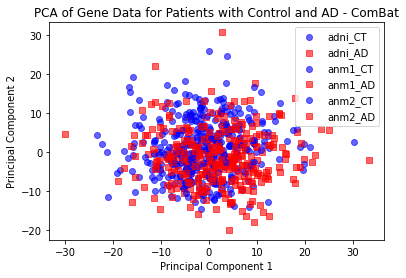

In [55]:
for (dataset, diagnosis) in labels.keys():
    subset = pca_df[(pca_df['dataset'] == dataset) & (pca_df['diagnosis'] == diagnosis)]
    plt.scatter(subset['PC2'], subset['PC3'],
                color=colors[(dataset, diagnosis)], 
                marker=markers[diagnosis], 
                label=labels[(dataset, diagnosis)], 
                alpha=0.6)

plt.title('PCA of Gene Data for Patients with Control and AD - ComBat')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()